In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
import joblib


In [53]:
datasets = {
    'Clean Water Access': 'nigeria-clean-water-access-statistics.csv',
    'Economic Growth Rate': 'nigeria-economic-growth-rate.csv',
    'Electricity Access': 'nigeria-electricity-access-statistics.csv',
    'GDP': 'nigeria-gdp-gross-domestic-product.csv',
    'Hunger Statistics': 'nigeria-hunger-statistics.csv',
    'Immigration Statistics': 'nigeria-immigration-statistics.csv',
    'Labor Force Participation': 'nigeria-labor-force-participation-rate.csv',
    'Literacy Rate': 'nigeria-literacy-rate.csv',
    'Poverty Rate': 'nigeria-poverty-rate.csv',
    'Unemployment Rate': 'nigeria-unemployment-rate.csv'
}
for name, file_path in datasets.items():
    print(f"--- {name} ---")
    try:
        # Loading dataset
        df = pd.read_csv(file_path)
        print("Columns:", df.columns.tolist())
        print("5 rows:\n", df.head())
        print("\n")
    except Exception as e:
        print(f"Error loading {name}: {e}")

--- Clean Water Access ---
Columns: ['Date', ' GDP (Billions of US $)', ' Per Capita (US $)', ' Annual % Change']
5 rows:
          Date   GDP (Billions of US $)   Per Capita (US $)   Annual % Change
0  12/31/2000                  12.6008                 NaN               NaN
1  12/31/2001                  12.9658                0.37               NaN
2  12/31/2002                  13.7774                0.81               NaN
3  12/31/2003                  14.6139                0.84               NaN
4  12/31/2004                  15.4755                0.86               NaN


--- Economic Growth Rate ---
Columns: ['Date', ' GDP (Billions of US $)', ' Per Capita (US $)', ' Annual % Change']
5 rows:
          Date   GDP (Billions of US $)   Per Capita (US $)   Annual % Change
0  12/31/1960                 4.196175             93.3970               NaN
1  12/31/1961                 4.467288             97.4210            0.1918
2  12/31/1962                 4.909399            104.852

In [54]:
# Load & processing datasets
processed_datasets = {}
for name, file_path in datasets.items():
    print(f"Processing: {name}")
    try:
        # Load the dataset
        df = pd.read_csv(file_path)
        
        # Convert 'Date' column to datetime format
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        
        # Sort by date
        df = df.sort_values(by='Date')
        
        # Impute missing values using forward-fill
        df_ffill = df.ffill()  # Updated to use ffill() directly
        
        # Interpolating missing values
        df_interpolated = df_ffill.interpolate(method='linear', limit_direction='forward')
        
        # Save processed dataframe
        processed_datasets[name] = df_interpolated
        
        print(f"Missing data handled for {name}\n")
    except Exception as e:
        print(f"Error processing {name}: {e}\n")


if 'Clean Water Access' in processed_datasets:
    print(processed_datasets["Clean Water Access"].head())

Processing: Clean Water Access
Missing data handled for Clean Water Access

Processing: Economic Growth Rate
Missing data handled for Economic Growth Rate

Processing: Electricity Access
Missing data handled for Electricity Access

Processing: GDP
Missing data handled for GDP

Processing: Hunger Statistics
Missing data handled for Hunger Statistics

Processing: Immigration Statistics
Missing data handled for Immigration Statistics

Processing: Labor Force Participation
Missing data handled for Labor Force Participation

Processing: Literacy Rate
Missing data handled for Literacy Rate

Processing: Poverty Rate
Missing data handled for Poverty Rate

Processing: Unemployment Rate
Missing data handled for Unemployment Rate

        Date   GDP (Billions of US $)   Per Capita (US $)   Annual % Change
0 2000-12-31                  12.6008                 NaN               NaN
1 2001-12-31                  12.9658                0.37               NaN
2 2002-12-31                  13.7774     

In [55]:
df.columns = df.columns.str.strip()

In [56]:
df.drop(columns=['Annual % Change'], inplace=True)

# check for the changes
print("\nDataFrame Info after handling missing values:")
df.info()

print("\nFirst 5 rows of the cleaned data:")
print(df.head())


DataFrame Info after handling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    33 non-null     datetime64[ns]
 1   GDP (Billions of US $)  33 non-null     float64       
 2   Per Capita (US $)       32 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 924.0 bytes

First 5 rows of the cleaned data:
        Date  GDP (Billions of US $)  Per Capita (US $)
0 1991-12-31                   3.741                NaN
1 1992-12-31                   3.705              -0.04
2 1993-12-31                   3.920               0.22
3 1994-12-31                   3.959               0.04
4 1995-12-31                   4.041               0.08


In [57]:
def clean_dataset(df, numeric_columns):
    # Convert 'Date' to datetime format
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        # Handle missing values in 'Date'
        df.dropna(subset=['Date'], inplace=True)  # Drop rows with missing dates
    else:
        print("Warning: 'Date' column missing in the dataset.")
        return None  # Skip datasets without a Date column

    # Standardize numeric columns
    for col in numeric_columns:
        if col in df.columns:
            # Convert to numeric and handle missing values
            df[col] = pd.to_numeric(df[col], errors='coerce')
            df[col] = df[col].fillna(df[col].mean())
        else:
            pass  # No need to print warnings for columns that are not in the dataset
    
    # Standardize column names
    column_rename_map = {
        'GDP (Billions of US $)': 'GDP',
        'Per Capita (US $)': 'Per Capita'
    }
    df.rename(columns=column_rename_map, inplace=True)

    return df

In [58]:
# Define numeric columns to clean
numeric_columns = ['GDP (Billions of US $)', 'Per Capita (US $)']

# Load and clean all datasets
datasets_cleaned = {}
for name, path in datasets.items():
    try:
        df = pd.read_csv(path)
        # Cleaning dataset
        cleaned_df = clean_dataset(df, numeric_columns)
        if cleaned_df is not None:
            datasets_cleaned[name] = cleaned_df
            print(f"Successfully cleaned: {name}")
        else:
            print(f"Skipped: {name}")
    except Exception as e:
        print(f"Error processing {name}: {e}")


Successfully cleaned: Clean Water Access
Successfully cleaned: Economic Growth Rate
Successfully cleaned: Electricity Access
Successfully cleaned: GDP
Successfully cleaned: Hunger Statistics
Successfully cleaned: Immigration Statistics
Successfully cleaned: Labor Force Participation
Successfully cleaned: Literacy Rate
Successfully cleaned: Poverty Rate
Successfully cleaned: Unemployment Rate


In [59]:
print(df.columns)

Index(['Date', ' GDP (Billions of US $)', ' Per Capita (US $)',
       ' Annual % Change'],
      dtype='object')


In [60]:
from functools import reduce

# Merging all datasets on 'Date'
merged_data = reduce(
    lambda left, right: pd.merge(left, right, on='Date', how='outer', suffixes=('', '_dup')),
    datasets_cleaned.values()
)

# Droping all duplicate columns 
merged_data = merged_data.loc[:, ~merged_data.columns.str.endswith('_dup')]

# Handling missing values after merging (with mean)
merged_data.fillna(merged_data.mean(), inplace=True)

# Saved the merged dataset for further use
merged_data.to_csv('merged_cleaned_data.csv', index=False)

print(merged_data.info())
print(merged_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     64 non-null     datetime64[ns]
 1    GDP (Billions of US $)  64 non-null     float64       
 2    Per Capita (US $)       64 non-null     float64       
 3    Annual % Change         0 non-null      float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.1 KB
None
        Date   GDP (Billions of US $)   Per Capita (US $)   Annual % Change
0 1960-12-31                21.361422            0.744545               NaN
1 1961-12-31                21.361422            0.744545               NaN
2 1962-12-31                21.361422            0.744545               NaN
3 1963-12-31                21.361422            0.744545               NaN
4 1964-12-31                21.361422            0.744545               NaN


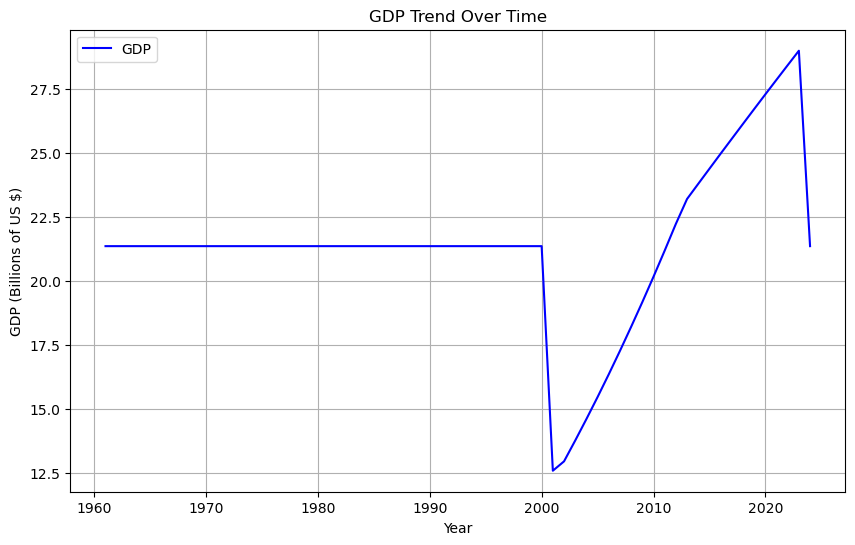

In [61]:
# Plot GDP trend over time
plt.figure(figsize=(10, 6))
plt.plot(merged_data['Date'], merged_data[' GDP (Billions of US $)'], label='GDP', color='blue')
plt.xlabel('Year')
plt.ylabel('GDP (Billions of US $)')
plt.title('GDP Trend Over Time')
plt.legend()
plt.grid()
plt.show()

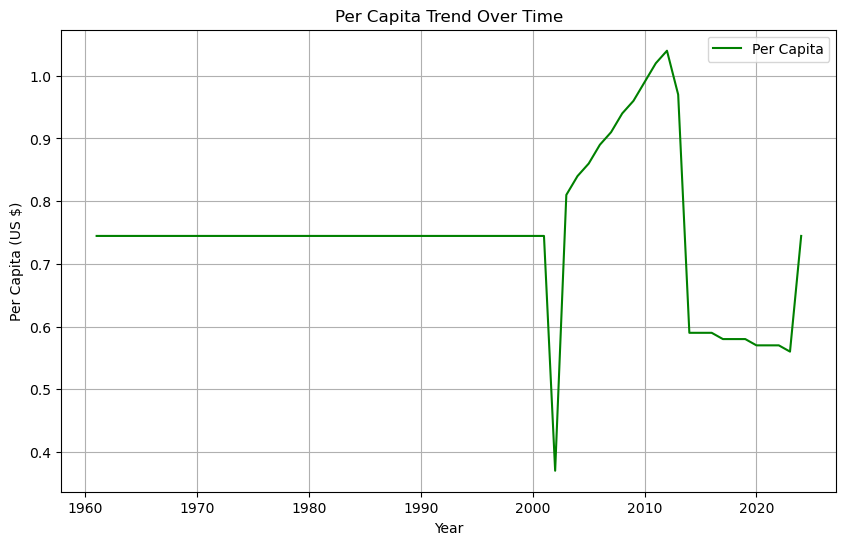

In [62]:
# Plot Per Capita trend over time
plt.figure(figsize=(10, 6))
plt.plot(merged_data['Date'], merged_data[' Per Capita (US $)'], label='Per Capita', color='green')
plt.xlabel('Year')
plt.ylabel('Per Capita (US $)')
plt.title('Per Capita Trend Over Time')
plt.legend()
plt.grid()
plt.show()

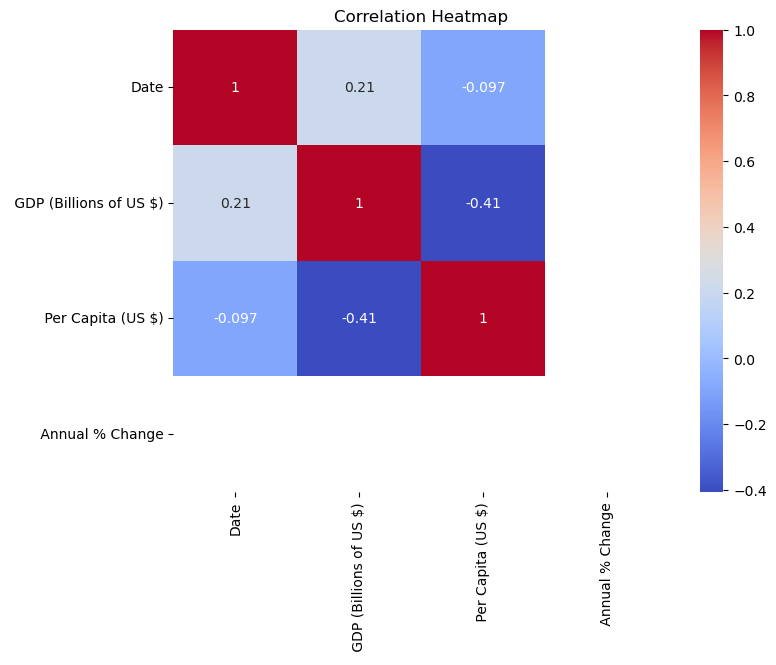

In [63]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [64]:
merged_data['GDP Growth Rate'] = merged_data[' GDP (Billions of US $)'].pct_change() * 100


In [65]:
merged_data['GDP Moving Avg'] = merged_data[' GDP (Billions of US $)'].rolling(window=3).mean()


In [66]:
# Create a proxy target variable for emigration based on GDP growth rate
merged_data['Emigration Proxy'] = 1 / (merged_data['GDP Growth Rate'] + 1e-5)  # Avoid division by zero


In [67]:
merged_data['GDP Change Rate'] = merged_data[' GDP (Billions of US $)'].pct_change()
merged_data['Emigration Proxy'] = -merged_data['GDP Change Rate']  # Negative change implies higher emigration


In [68]:
# Simulate emigration data using economic indicators
np.random.seed(42)  # For reproducibility
merged_data['Emigration Proxy'] = (
    -merged_data['GDP Growth Rate'] * np.random.uniform(0.8, 1.2, len(merged_data))
)


In [69]:
# Use relevant features for clustering
features_for_clustering = merged_data[[' GDP (Billions of US $)', ' Per Capita (US $)', 'GDP Growth Rate']]
kmeans = KMeans(n_clusters=3, random_state=42).fit(features_for_clustering.fillna(0))

# Assign cluster labels as the target
merged_data['Emigration Proxy'] = kmeans.labels_


C:\Users\Axume Limited\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [70]:
merged_data['Composite Index'] = (
    0.5 * merged_data['GDP Growth Rate'] + 
    0.3 * merged_data[' Per Capita (US $)'] +
    0.2 * merged_data[' GDP (Billions of US $)']
)
merged_data['Emigration Proxy'] = 1 / (merged_data['Composite Index'] + 1e-5)


In [71]:
# Display the dataset with the new target variable
print(merged_data[['Date', 'Composite Index', 'Emigration Proxy']].head())

        Date  Composite Index  Emigration Proxy
0 1960-12-31              NaN               NaN
1 1961-12-31         4.495648          0.222437
2 1962-12-31         4.495648          0.222437
3 1963-12-31         4.495648          0.222437
4 1964-12-31         4.495648          0.222437


In [72]:
# Define features and target
X = merged_data[[' GDP (Billions of US $)', ' Per Capita (US $)', 'GDP Growth Rate']]
y = merged_data['Emigration Proxy']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check data sizes
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 51
Testing set size: 13


In [73]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())
print(y_train.isnull().sum())
print(y_test.isnull().sum())


 GDP (Billions of US $)    0
 Per Capita (US $)         0
GDP Growth Rate            0
dtype: int64
 GDP (Billions of US $)    0
 Per Capita (US $)         0
GDP Growth Rate            1
dtype: int64
0
1


In [74]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())
y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_test.mean())


In [75]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())


 GDP (Billions of US $)    0
 Per Capita (US $)         0
GDP Growth Rate            0
dtype: int64
 GDP (Billions of US $)    0
 Per Capita (US $)         0
GDP Growth Rate            0
dtype: int64


In [76]:
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.0006276259013689921
R-squared: 0.8832504205013149


In [77]:

feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
print(feature_importances.sort_values(ascending=False))


GDP Growth Rate            0.888022
 Per Capita (US $)         0.058052
 GDP (Billions of US $)    0.053926
dtype: float64


In [78]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)


{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.6666947315822096


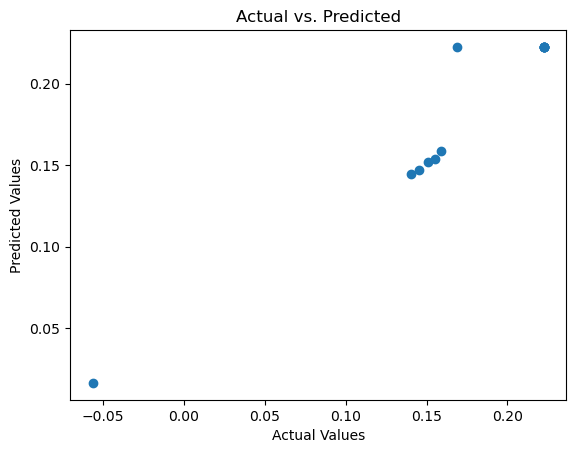

In [79]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.show()


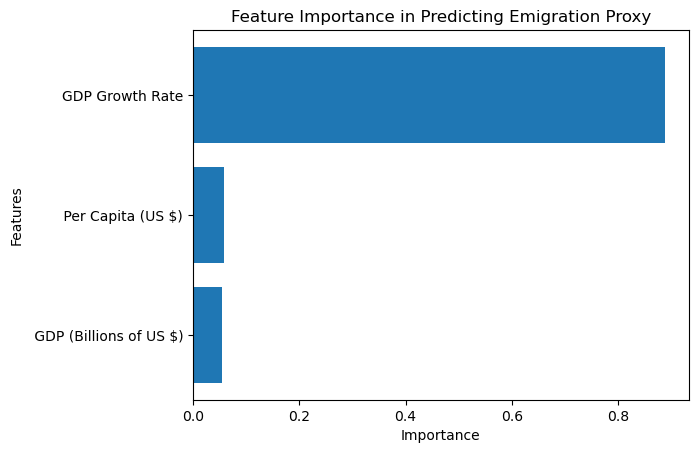

In [80]:
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importances
plt.barh(feature_names, importances)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Predicting Emigration Proxy")
plt.show()


In [81]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
print(feature_importances.sort_values(ascending=False))

GDP Growth Rate            0.888022
 Per Capita (US $)         0.058052
 GDP (Billions of US $)    0.053926
dtype: float64


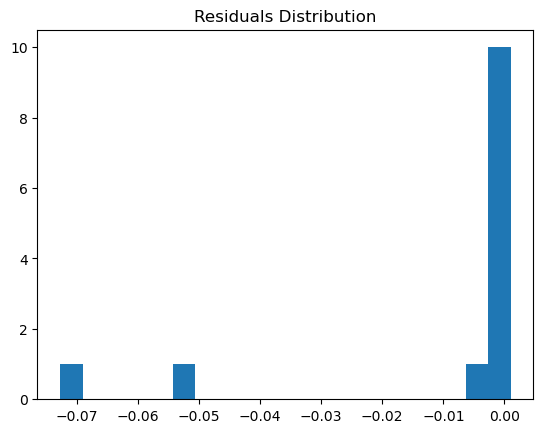

In [82]:
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.title("Residuals Distribution")
plt.show()


In [83]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R²:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best R²: 0.6667346050432512


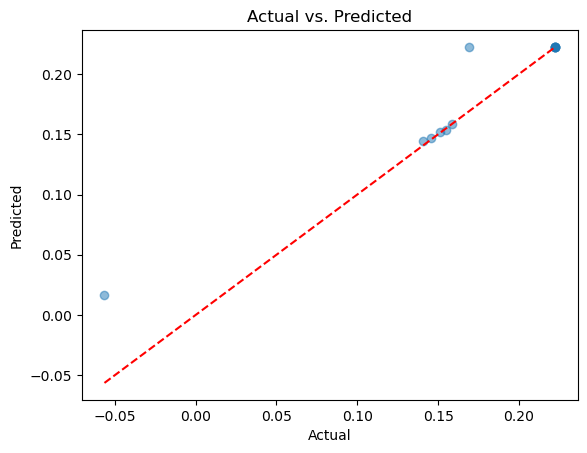

In [84]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")
plt.show()

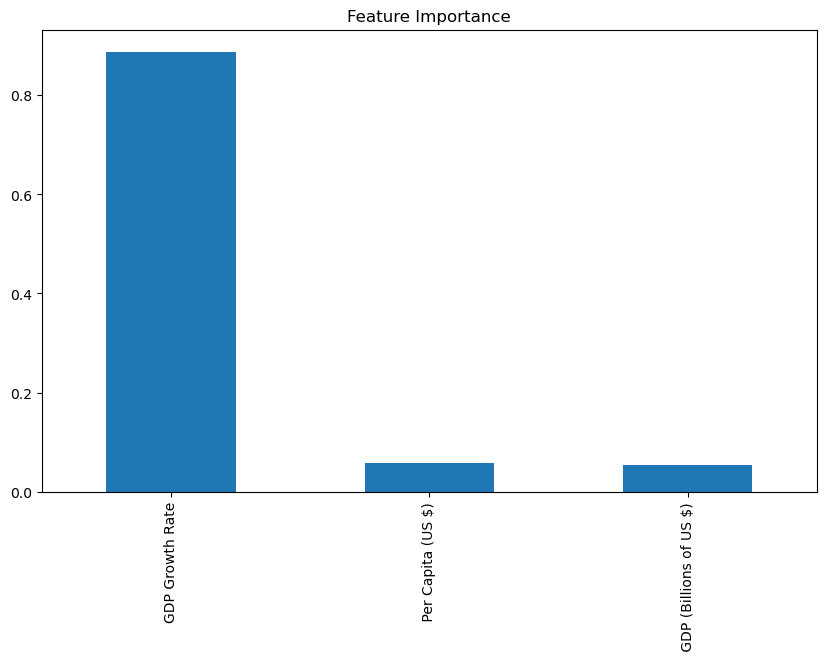

In [85]:
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title("Feature Importance")
plt.show()


In [87]:
#save your trained model
joblib.dump(model, "random_forest_model.pkl")


['random_forest_model.pkl']